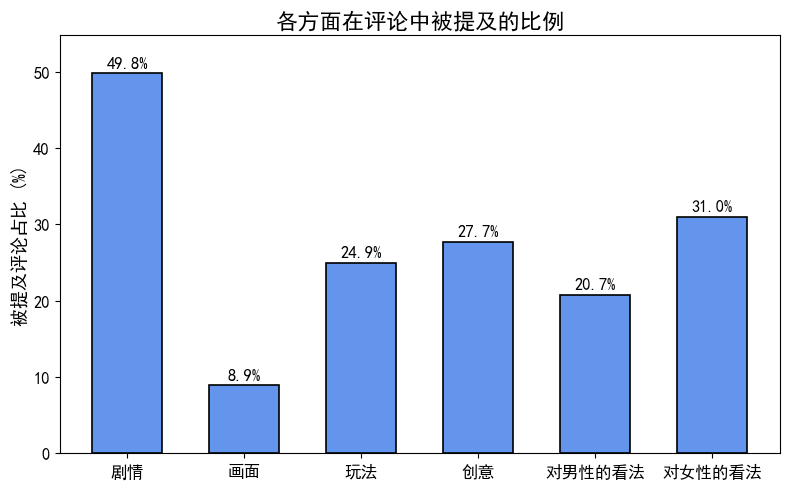

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 1. 读取数据
csv_path = 'sentiment_aspects.csv'
df = pd.read_csv(csv_path, encoding='utf-8')

# 2. 统计每个方面被提及的比例
aspects = ["剧情", "画面", "玩法", "创意", "对男性的看法", "对女性的看法"]

aspect_mentioned = {}
n_total = len(df)

for aspect in aspects:
    col = f"{aspect}_意见术语"
    # 统计“不是没有提及”且不是空的
    count = df[(df[col].notnull()) & (df[col] != "") & (df[col] != "没有提及")].shape[0]
    aspect_mentioned[aspect] = count / n_total

# 3. 可视化
plt.figure(figsize=(8,5))
bars = plt.bar(aspect_mentioned.keys(), [v*100 for v in aspect_mentioned.values()], width=0.6, edgecolor='black', linewidth=1.2)
plt.title('各方面在评论中被提及的比例', fontsize=16)
plt.ylabel('被提及评论占比 (%)', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max([v*100 for v in aspect_mentioned.values()])+5)

# 美化：柱子颜色和标签
for bar in bars:
    bar.set_facecolor('#6495ED')
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


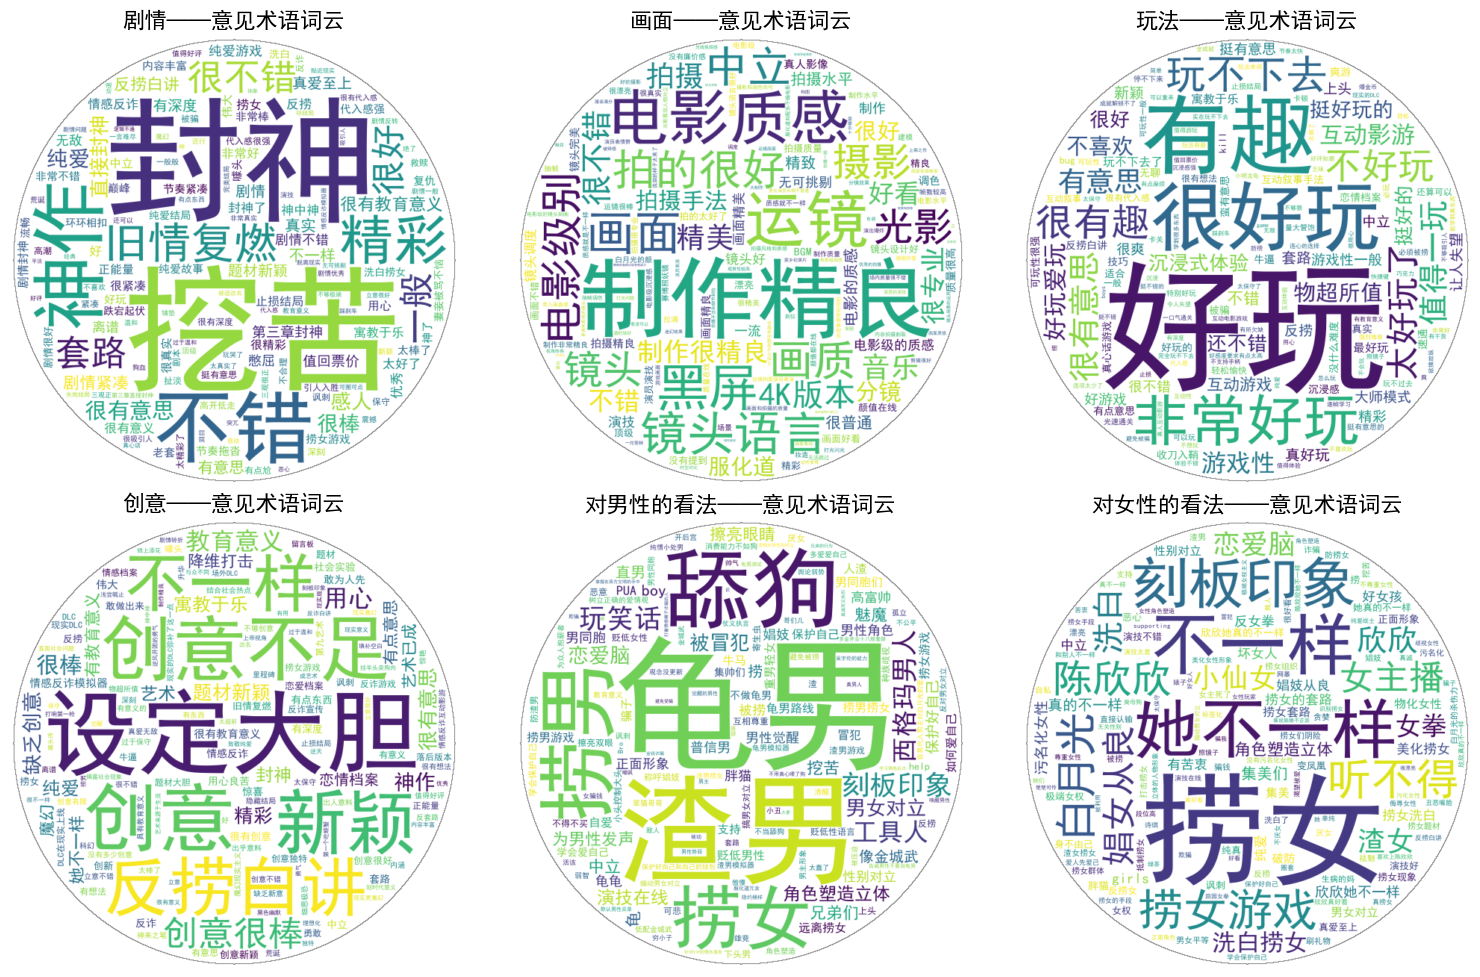

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

aspects = ["剧情", "画面", "玩法", "创意", "对男性的看法", "对女性的看法"]

font_path = r'C:\Users\lu\AppData\Local\Microsoft\Windows\Fonts\simhei.ttf'  

# 创建一个 x, y 的网格坐标
x, y = np.ogrid[:600, :600]
# 创建一个布尔值的蒙版，中心为 True，外部为 False
mask = (x - 300) ** 2 + (y - 300) ** 2 > 295 ** 2
# 将布尔值转为 255（白色，代表蒙版区域），0 的区域是绘图区
mask = 255 * mask.astype(int)


plt.figure(figsize=(16, 10))

for i, aspect in enumerate(aspects):
    # 准备文本数据，去除空值和特定词语
    text = " ".join([
        str(term) for term in df[f"{aspect}_意见术语"].dropna()
        if term not in ["", "没有提及"]
    ])
    
    # 如果某个方面没有词语，则跳过，避免报错
    if not text:
        # 绘制一个空白的子图并添加提示
        plt.subplot(2, 3, i + 1)
        plt.text(0.5, 0.5, '无数据', ha='center', va='center', fontsize=20, color='grey')
        plt.axis('off')
        plt.title(f'{aspect}——意见术语词云', fontsize=16, pad=15)
        continue

    # --- 修改：WordCloud 参数，使其更美观 ---
    wordcloud = WordCloud(font_path=font_path,
                          width=600,  # 提高分辨率
                          height=600, # 提高分辨率
                          background_color='white',
                          max_words=150,
                          collocations=False,
                          mask=mask,  # 应用圆形蒙版
                          colormap='viridis',  # 使用学术风格色系 
                          contour_width=0.5,   # 添加词语轮廓线
                          contour_color='grey' # 轮廓线颜色
                         ).generate(text)
    
    plt.subplot(2, 3, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{aspect}——意见术语词云', fontsize=16, pad=7) # 适当增加pad，给标题留出空间

# --- 修改：调整子图间距 ---
# hspace 控制上下间距，wspace 控制左右间距。将 hspace 减小。
plt.subplots_adjust(hspace=0.08, wspace=0, top=0.94, bottom=0.01, left=0.02, right=0.97)
plt.show()

In [33]:
import pandas as pd

# 读取你的csv文件
csv_path = 'sentiment_aspects.csv'
df = pd.read_csv(csv_path, encoding='utf-8')

aspects = ["剧情", "画面", "玩法", "创意", "对男性的看法", "对女性的看法"]
emotion_types = [
    "惊喜", "赞美", "开心", "乐观",
    "担忧", "讽刺", "生气", "失望", "中立"
]

stats = []

for aspect in aspects:
    col = f"{aspect}_情感类型"
    valid = df[col].dropna()
    valid = valid[(valid != "") & (valid != "没有提及") & (valid.isin(emotion_types))]
    count = valid.value_counts().reindex(emotion_types, fill_value=0)  # 保证9类全有
    for label, num in count.items():
        stats.append({"方面": aspect, "情感类型": label, "数量": num})

result = pd.DataFrame(stats)
print(result)
result.to_csv('方面情感类型数量统计.csv', index=False, encoding='utf-8-sig')

        方面 情感类型    数量
0       剧情   惊喜   985
1       剧情   赞美  1890
2       剧情   开心   336
3       剧情   乐观    37
4       剧情   担忧   111
5       剧情   讽刺   554
6       剧情   生气   152
7       剧情   失望  1313
8       剧情   中立   626
9       画面   惊喜    45
10      画面   赞美   741
11      画面   开心    69
12      画面   乐观     2
13      画面   担忧     8
14      画面   讽刺    19
15      画面   生气    22
16      画面   失望    86
17      画面   中立   482
18      玩法   惊喜   285
19      玩法   赞美   418
20      玩法   开心   769
21      玩法   乐观    25
22      玩法   担忧    61
23      玩法   讽刺   120
24      玩法   生气   289
25      玩法   失望   741
26      玩法   中立   521
27      创意   惊喜  1549
28      创意   赞美   892
29      创意   开心    34
30      创意   乐观    48
31      创意   担忧    36
32      创意   讽刺   253
33      创意   生气    18
34      创意   失望   255
35      创意   中立   431
36  对男性的看法   惊喜    27
37  对男性的看法   赞美   490
38  对男性的看法   开心    79
39  对男性的看法   乐观    39
40  对男性的看法   担忧   118
41  对男性的看法   讽刺  1056
42  对男性的看法   生气   377
43  对男性的看法   失望    62
44  对男性的看法

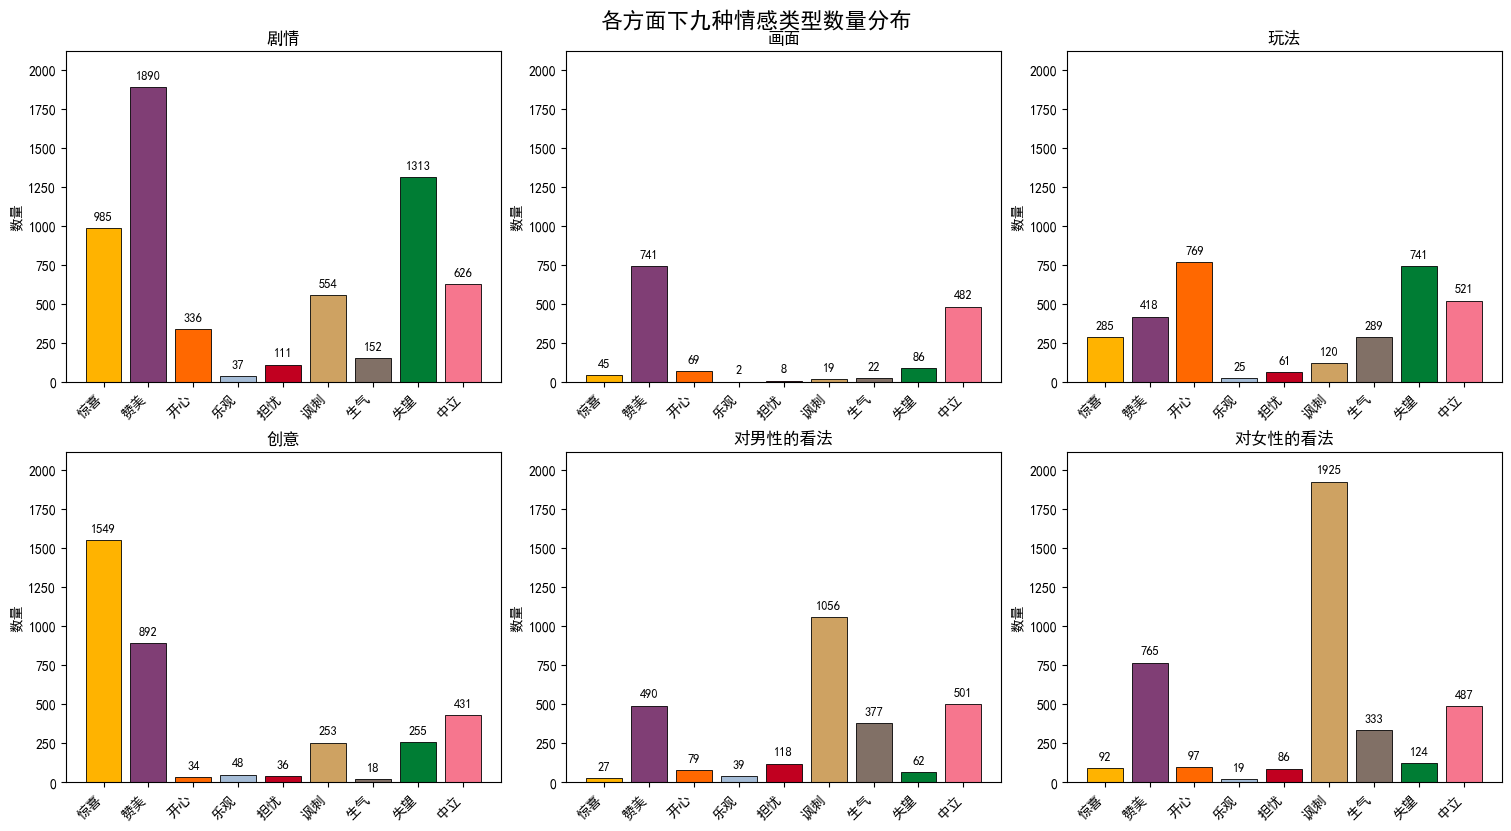

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 读取“方面–情感类型–数量”CSV
csv_path = '方面情感类型数量统计.csv'  # 请按实际路径调整
df = pd.read_csv(csv_path, encoding='utf-8')

# 2. 固定顺序和颜色
aspects = ["剧情", "画面", "玩法", "创意", "对男性的看法", "对女性的看法"]
emotions = ["惊喜", "赞美", "开心", "乐观", "担忧", "讽刺", "生气", "失望", "中立"]
colors = [
    '#FFB300', '#803E75', '#FF6800', '#A6BDD7', '#C10020',
    '#CEA262', '#817066', '#007D34', '#F6768E'
]

# 3. 构建透视表：行=方面，列=情感，值=数量
pivot = (
    df
    .pivot(index='方面', columns='情感类型', values='数量')
    .reindex(aspects)
    .fillna(0)[emotions]
)

# 4. 绘制2×3子图，每个子图一个方面的条形图
fig, axes = plt.subplots(2, 3, figsize=(15, 8), constrained_layout=True)
axes = axes.flatten()

max_count = pivot.values.max()

for ax, aspect in zip(axes, aspects):
    vals = pivot.loc[aspect]
    bars = ax.bar(
        emotions,
        vals,
        color=colors,
        edgecolor='black',
        linewidth=0.6
    )
    ax.set_title(f'{aspect}', fontsize=12)
    ax.set_ylim(0, max_count * 1.1)
    ax.set_xticks(range(len(emotions)))
    ax.set_xticklabels(emotions, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel('数量', fontsize=10)
    # 在每个柱子上方标注数值
    for bar in bars:
        h = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            h + max_count*0.02,
            f'{int(h)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# 如果子图多余则隐藏
for i in range(len(aspects), len(axes)):
    axes[i].axis('off')

# 总标题
fig.suptitle('各方面下九种情感类型数量分布', fontsize=16, y=1.02)
plt.show()


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import matplotlib
import pandas as pd

# --- 1. 数据准备和处理 ---
# 从 CSV 文件加载数据
csv_file_path = 'sentiment_aspects.csv'
df = pd.read_csv(csv_file_path)
print(f"成功从 '{csv_file_path}' 加载数据。")

df.columns = df.columns.str.strip()

records = []
for aspect in ["剧情","画面","玩法","创意","对男性的看法","对女性的看法"]:
    col = f"{aspect}_情感类型"
    # 跳过不存在的列
    if col not in df:
        continue
    temp = df[[col]].copy()
    temp.columns = ["情感类型"]
    temp["方面"] = aspect
    # 只保留有提及的行
    temp = temp[temp["情感类型"].notna() & (temp["情感类型"]!="没有提及")]
    records.append(temp)

long_df = pd.concat(records, ignore_index=True)

stat = (long_df
        .groupby(["方面","情感类型"], as_index=False)
        .size()
        .rename(columns={"size":"数量"}))

stat["方面总数"] = stat.groupby("方面")["数量"].transform("sum")
stat["比重"] = (stat["数量"]/stat["方面总数"]).round(3)

# 定义方面和情感的顺序，以确保图表一致性
aspects_order = ['剧情', '画面', '玩法', '创意', '对男性的看法', '对女性的看法']
emotions_order = ['惊喜', '赞美', '开心', '乐观', '担忧', '讽刺', '生气', '失望', '中立']

# 创建最终用于绘图的 plot_data 列表
plot_data = []
for aspect in aspects_order:
    # 从 stat 里提取当前方面的数据，并按 emotions_order 补齐
    aspect_df = (
        stat[stat['方面'] == aspect]
        .set_index('情感类型')
        .reindex(emotions_order, fill_value=0)
    )
    # 用 比重 作为柱高
    proportions = aspect_df['比重'].tolist()
    # 因为没误差和显著性，这里用全零和空字符串占位
    zeros    = [0.0] * len(emotions_order)
    empties  = ['']  * len(emotions_order)
    # 最后两项 min/max 一律 0–1
    plot_data.append((aspect, proportions, zeros, empties, 0.0, 1.0))

# --- 2. Matplotlib 和图表参数设置 ---
matplotlib.use('TkAgg')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 图表整体配置参数
n_segments = len(aspects_order)
outer_radius = 1.0
inner_radius = 0.3
radial_padding_top = 0.05
plotting_outer_radius = outer_radius - radial_padding_top
gap_degree = 8
side_padding_degree = 0.5
start_angle_offset = 90
edge_color = 'black'
segment_line_width = 1
bar_line_width = 0.5
label_fontsize = 10
legend_fontsize = 12
background_segment_alpha = 0.5

# 其他显示参数
show_error_bars = False
show_significance = False
show_single_outer_arc = True
outer_arc_radial_gap = 0.08
outer_arc_thickness = 0.04
outer_arc_edge_color = 'black'
outer_arc_linewidth = 0.5
outer_arc_zorder = 1.5

# 指标类别标签位置参数
category_label_radial_pos_in_gap = 0.5
if show_single_outer_arc:
    category_label_radius = outer_radius + outer_arc_radial_gap * category_label_radial_pos_in_gap
else:
    category_label_radius = outer_radius * 1.05

# 数值标注参数
show_annotations = True
annotation_fontsize = 10
annotation_color = 'black'
annotation_outside_offset_deg = -2.7

# 内部参考虚线参数
show_annotation_lines = True
annotation_line_color = '#555555'
annotation_line_width = 0.6
annotation_line_style = '--'
annotation_line_points = 20

# 背景扇区颜色列表
your_manual_colors = ['#CCCCFF', '#CCFFCC', '#FFFFCC', '#99FFFF', '#99CCFF', '#FFCCFF']

# 条形图特定参数 (情感类型)
num_bars_per_group = len(emotions_order)
treatment_colors = ['#FF6666', '#FFCC66', '#FFFF66', '#66FF66', '#66FFFF', '#6666FF', '#CC66FF', '#CCCCCC', '#999999']
treatment_labels = emotions_order
intra_bar_gap_factor = 0.1

# 辅助函数 (无需修改)
def scale_value_to_radius(value, segment_min, segment_max, inner_r, plot_outer_r):
    value_range = segment_max - segment_min
    ring_radial_width_effective = plot_outer_r - inner_r
    if ring_radial_width_effective <= 0: return inner_r
    if value_range <= 0:
        relative_pos = 0.5
    else:
        relative_pos = (value - segment_min) / value_range
        relative_pos = max(0.0, min(1.0, relative_pos))
    target_radius = inner_r + relative_pos * ring_radial_width_effective
    clipped_radius = max(inner_r, min(plot_outer_r, target_radius))
    return clipped_radius

# --- 3. 开始绘图 ---

# 计算角度参数
ring_radial_width = outer_radius - inner_radius
total_gap_degrees = n_segments * gap_degree
total_segment_degrees = 360.0 - total_gap_degrees
segment_degree = total_segment_degrees / n_segments
available_bar_angle = segment_degree - 2 * side_padding_degree
total_bar_units = num_bars_per_group + (num_bars_per_group - 1) * intra_bar_gap_factor
if total_bar_units <= 0: total_bar_units = 1
bar_angular_unit_width = available_bar_angle / total_bar_units
bar_angular_width = bar_angular_unit_width
intra_bar_gap_angle = bar_angular_unit_width * intra_bar_gap_factor

# 计算每个扇区的角度
segment_center_angles = []
current_center_angle = start_angle_offset
for _ in range(n_segments):
    segment_center_angles.append(current_center_angle)
    current_center_angle -= (segment_degree + gap_degree)
segment_start_angles = [center + segment_degree / 2.0 for center in segment_center_angles]
segment_end_angles = [center - segment_degree / 2.0 for center in segment_center_angles]

# Matplotlib 绘图设置
fig, ax = plt.subplots(figsize=(13, 11)) # 调整画布大小以容纳外部图例
ax.set_aspect('equal', adjustable='box')

# 计算画布显示范围
lim_padding = 0.03
lim = (category_label_radius + lim_padding) * 1.05
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.axis('off')

print("正在生成图表...")

# --- 循环绘制每个扇区 ---
for i in range(n_segments):
    metric_label, means, _, _, segment_min, segment_max = plot_data[i]
    segment_start_angle = segment_start_angles[i]
    segment_end_angle = segment_end_angles[i]
    segment_bg_color = your_manual_colors[i % len(your_manual_colors)]

    # 1. 绘制背景扇形和外部弧形
    background_wedge = patches.Wedge(center=(0, 0), r=outer_radius, theta1=segment_end_angle, theta2=segment_start_angle, width=ring_radial_width, facecolor=segment_bg_color, edgecolor=edge_color, linewidth=segment_line_width, alpha=background_segment_alpha, zorder=1)
    ax.add_patch(background_wedge)
    if show_single_outer_arc:
        arc_r_inner = outer_radius + outer_arc_radial_gap
        arc_r_outer = arc_r_inner + outer_arc_thickness
        outer_arc_wedge = patches.Wedge(center=(0, 0), r=arc_r_outer, theta1=segment_end_angle, theta2=segment_start_angle, width=outer_arc_thickness, facecolor=segment_bg_color, alpha=1.0, edgecolor=outer_arc_edge_color, linewidth=outer_arc_linewidth, zorder=outer_arc_zorder)
        ax.add_patch(outer_arc_wedge)

    # 2. 绘制条形图
    current_bar_start_angle = segment_start_angle - side_padding_degree
    for j in range(num_bars_per_group):
        mean_val = means[j]
        bar_color = treatment_colors[j % len(treatment_colors)]
        bar_top_radius = scale_value_to_radius(mean_val, segment_min, segment_max, inner_radius, plotting_outer_radius)
        bar_radial_thickness = max(0, bar_top_radius - inner_radius)
        if bar_radial_thickness > 1e-6:
            bar_wedge = patches.Wedge(center=(0, 0), r=bar_top_radius, theta1=current_bar_start_angle - bar_angular_width, theta2=current_bar_start_angle, width=bar_radial_thickness, facecolor=bar_color, edgecolor=edge_color, linewidth=bar_line_width, zorder=2)
            ax.add_patch(bar_wedge)
        current_bar_start_angle -= (bar_angular_width + intra_bar_gap_angle)

    # 3. 添加内部参考虚线和百分比标注
    if show_annotations and (segment_max > segment_min):
        annotation_fractions = [0.25, 0.5, 0.75]
        for frac in annotation_fractions:
            radius = scale_value_to_radius(frac, segment_min, segment_max, inner_radius, plotting_outer_radius)
            if show_annotation_lines:
                line_angles = np.radians(np.linspace(segment_end_angle, segment_start_angle, 20))
                ax.plot(radius * np.cos(line_angles), radius * np.sin(line_angles), linestyle=annotation_line_style, color=annotation_line_color, linewidth=annotation_line_width, zorder=3.5)
            
            angle_rad = np.radians(segment_start_angle + annotation_outside_offset_deg)
            annot_text = f"{frac:.0%}"
            angle_deg_norm = (segment_start_angle + annotation_outside_offset_deg) % 360
            rotation = angle_deg_norm + 90 if 90 < angle_deg_norm <= 270 else angle_deg_norm - 90
            ax.text(radius * np.cos(angle_rad), radius * np.sin(angle_rad), annot_text, ha='center', va='center', fontsize=annotation_fontsize, color=annotation_color, rotation=rotation, rotation_mode='anchor', zorder=4)

    # 4. 添加方面标签
    mid_angle_rad = np.radians((segment_start_angle + segment_end_angle) / 2.0)
    label_x, label_y = category_label_radius * np.cos(mid_angle_rad), category_label_radius * np.sin(mid_angle_rad)
    mid_angle_deg = (segment_start_angle + segment_end_angle) / 2.0 % 360
    if 90 < mid_angle_deg < 270:
        rotation, va = mid_angle_deg + 90, 'top'
    else:
        rotation, va = mid_angle_deg - 90, 'bottom'
    ax.text(label_x, label_y, metric_label, ha='center', va=va, rotation=rotation, rotation_mode='anchor', fontsize=label_fontsize, zorder=5)

# --- 添加图例 (已移动到图表右侧) ---
legend_handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=legend_fontsize * 0.8, linestyle='None', label=label)
                  for color, label in zip(treatment_colors, treatment_labels)]

ax.legend(
    handles=legend_handles,
    loc='upper left',          # 将图例的“左上角”作为锚点
    bbox_to_anchor=(1.02, 1.0),# 将锚点放置在绘图区域的右侧外部
    fontsize=legend_fontsize,
    frameon=False,
    labelspacing=0.8
)

# --- 保存并显示图形 ---
output_filename = '情感比重分析环形图.png'
plt.savefig(output_filename, dpi=700, bbox_inches='tight') # bbox_inches='tight' 确保图例能被完整保存
print(f"图表已保存为：{output_filename}")

plt.show()

成功从 'sentiment_aspects.csv' 加载数据。
正在生成图表...
图表已保存为：情感比重分析环形图.png


In [4]:
proportions

[0.023, 0.193, 0.024, 0.005, 0.022, 0.485, 0.084, 0.031, 0.123]